# Practical Introduction to Data Science

1. Data Cleaning
2. Analysis
3. Modelling
4. Review

---

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pathlib

# Data Description

![](2022-09-19-18-06-54.png)


In [168]:
filepath = 'train.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Cleaning

1. Which features are categorical and which are numerical?
2. Available Data Types?
3. None, blank or empty values?

---

## Which Features are Categorical and which are Numerical?

In [205]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId


In [204]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
CryoSleep
Age
VIP
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported
Port
HomePlanet_0
HomePlanet_1
HomePlanet_2
Destination_0
Destination_1
Destination_2
Deck_0
Deck_1
Deck_2
Deck_3
Deck_4
Deck_5
Deck_6
Deck_7


In [171]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [210]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
CryoSleep,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0
Transported,0


In [211]:
def get_nulls_percentage(df):    
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values
    
    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['% nulls'])
    return df_nulls
    
get_nulls_percentage(df)
    

,% nulls
PassengerId,0.0%
CryoSleep,0.0%
Age,0.0%
VIP,0.0%
RoomService,0.0%
FoodCourt,0.0%
ShoppingMall,0.0%
Spa,0.0%
VRDeck,0.0%
Transported,0.0%


Approaches to handle None values:

Categorical variables

- Replace None values with the most common value in the column

Numerical variables

- Replace the values with the mean (for numerical values, continuous)

In [212]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])    

In [213]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [214]:
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
CryoSleep,0.0%
Age,0.0%
VIP,0.0%
RoomService,0.0%
FoodCourt,0.0%
ShoppingMall,0.0%
Spa,0.0%
VRDeck,0.0%
Transported,0.0%


# Analysis

1. Data Exploration
2. Feature Engineering
3. Data Visualization

## Data Exploration

Numerical data

In [215]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Port,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Destination_1,Destination_2,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.516162,0.552514,0.245140,0.202347,...,0.091568,0.207063,0.089612,0.321408,0.029449,0.317267,0.100771,0.054987,0.085931,0.000575
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.499767,0.497263,0.430195,0.401772,...,0.288432,0.405224,0.285642,0.467044,0.169071,0.465439,0.301042,0.227968,0.280279,0.023977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Categorical Data

In [216]:
df.describe(include=['O'])

,PassengerId
count,8693
unique,8693
top,6915_01
freq,1


In [217]:
# Dropping the name column we don't need anymore
df.drop(['Name'], axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [178]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [218]:
categorical_variables

Index(['PassengerId'], dtype='object')

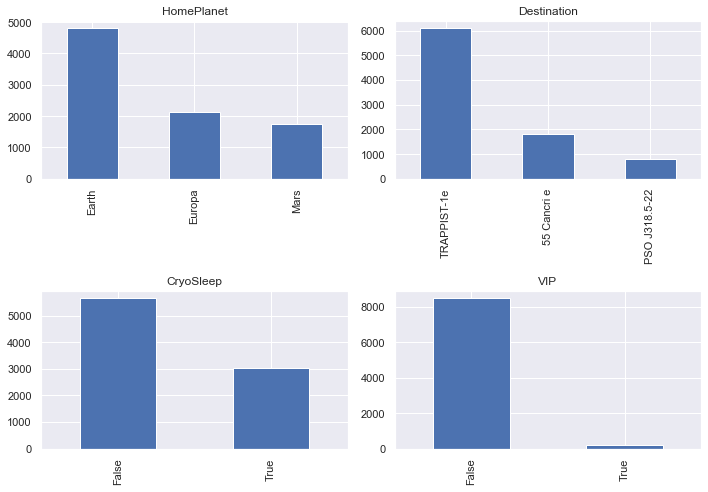

In [180]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [181]:
df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [182]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

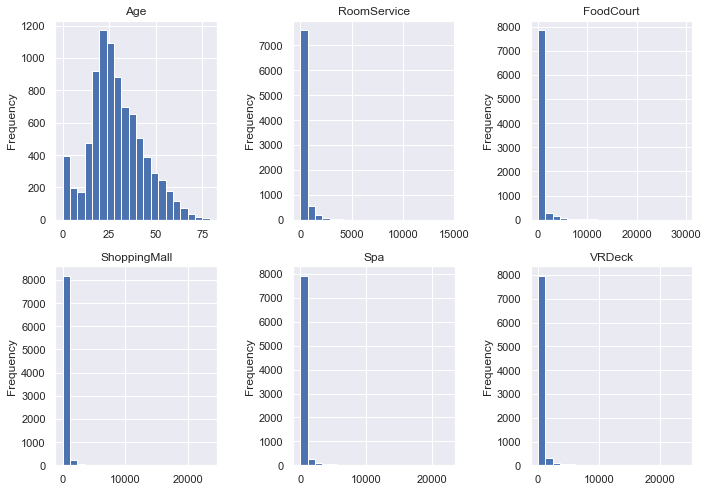

In [183]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

# Feature Engineering

1. Build 2 features out of the 'CAbin' column: deck and port


In [184]:
# building the deck and port features from the 'cabin' column
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [185]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [186]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [149]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [189]:
df.unique()

<bound method DataFrame.info of      PassengerId  HomePlanet  CryoSleep  Destination   Age    VIP  \
0        0001_01           1      False            0  39.0  False   
1        0002_01           0      False            0  24.0  False   
2        0003_01           1      False            0  58.0   True   
3        0003_02           1      False            0  33.0  False   
4        0004_01           0      False            0  16.0  False   
...          ...         ...        ...          ...   ...    ...   
8688     9276_01           1      False            2  41.0   True   
8689     9278_01           0       True            1  18.0  False   
8690     9279_01           0      False            0  26.0  False   
8691     9280_01           1      False            2  32.0  False   
8692     9280_02           1      False            0  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  Deck  \
0             0.0        0.0           0.0     0.0     0.0

In [219]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

In [152]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [220]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Port,...,Destination_1,Destination_2,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,0,0,1,0,0,0,0,0,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,...,0,0,0,1,0,0,0,0,0,0
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,...,0,0,0,0,1,0,0,0,0,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,...,0,0,0,0,1,0,0,0,0,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,0,0,0,1,0,0,0,0,0,0


In [154]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [155]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [194]:
df1

In [195]:

df=pd.get_dummies(df , columns=['HomePlanet','Destination','Deck'])
df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_1,Destination_2,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,1,0,0,0,0,0,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,1,0,0,0,0,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,1,0,0,0,0,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,0,1,0,0,1,0,0,0,0,0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,0,0,1,0,0,0,0
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,0,0,0,0,1,0,0,0,0
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [222]:
filename =  pathlib.Path(filepath).stem + "_cleaned.csv"
file_dest_path = pathlib.Path("./data") / filename
df.to_csv(file_dest_path, index=False)

# Modelling

1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
3. Plot the results
4. Pick a winner
5. Submit our predictions

In [223]:
df_train = pd.read_csv("./data/train_cleaned.csv")
# 1. Train Test Split
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

In [224]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 23), (6954,), (1739, 23), (1739,))

In [236]:
# 2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting
lg = LogisticRegression(penalty='none', solver='lbfgs')
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

c:\Users\Hello Rainbow\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
# fitting random forest model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [304]:
gb = GradientBoostingClassifier(learning_rate=0.3,n_estimators=100)
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [231]:
from sklearn.svm import SVC
svc = SVC( C=0.5,gamma='scale', kernel='rbf' ,random_state=15)
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [305]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.783784
1,Random Forest,0.783784
2,Gradient Boosting,0.796435
3,SVM,0.773433


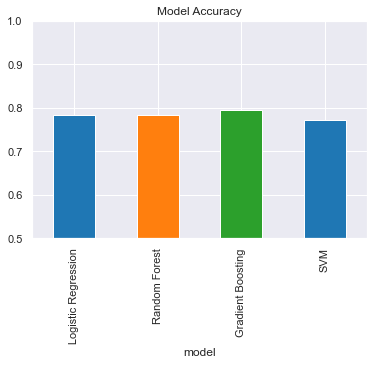

In [306]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);